In [1]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

database = 'qardio'
host = '127.0.0.1'
user = 'root'
password = 'Party100'
url = f'mysql+mysqlconnector://{user}:{password}@{host}/{database}'
engine = sqlalchemy.create_engine(url, echo=True)
conn = engine.connect()

pd.set_option('display.max_columns', 500)

2023-06-22 15:22:31,401 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-06-22 15:22:31,401 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-06-22 15:22:31,404 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-06-22 15:22:31,404 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-06-22 15:22:31,406 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-06-22 15:22:31,407 INFO sqlalchemy.engine.Engine [raw sql] {}


(array([18993., 19052., 19113., 19174., 19236., 19297., 19358., 19417.,
        19478., 19539.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07')])

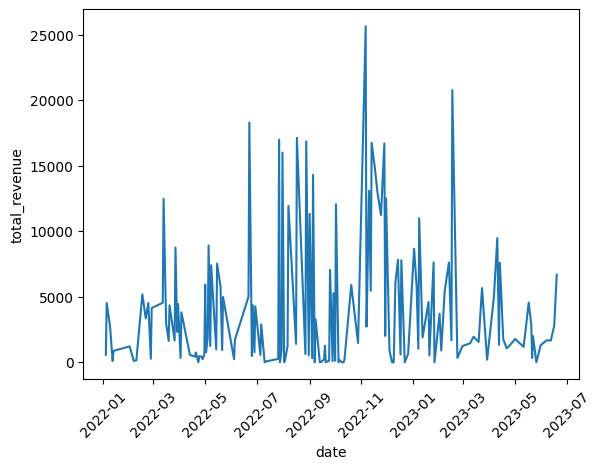

In [4]:
sns.lineplot(data=existing_data, x='date', y='total_revenue')
plt.xticks(rotation=45)

In [2]:
# query database
existing_data = pd.read_sql(sql='SELECT * FROM day_email_rev;', con=conn)
existing_data

2023-06-22 15:22:32,415 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2023-06-22 15:22:32,418 INFO sqlalchemy.engine.Engine [generated in 0.00523s] {'table_schema': 'qardio', 'table_name': 'SELECT * FROM day_email_rev;'}
2023-06-22 15:22:32,423 INFO sqlalchemy.engine.Engine SELECT * FROM day_email_rev;
2023-06-22 15:22:32,424 INFO sqlalchemy.engine.Engine [raw sql] {}


,date,total_revenue
0,2022-01-04,571.01
1,2022-01-05,4525.11
2,2022-01-06,NaN
3,2022-01-07,NaN
4,2022-01-08,NaN
...,...,...
527,2023-06-15,NaN
528,2023-06-16,2784.56
529,2023-06-17,NaN
530,2023-06-18,NaN


(array([18993., 19052., 19113., 19174., 19236., 19297., 19358., 19417.,
        19478., 19539.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07')])

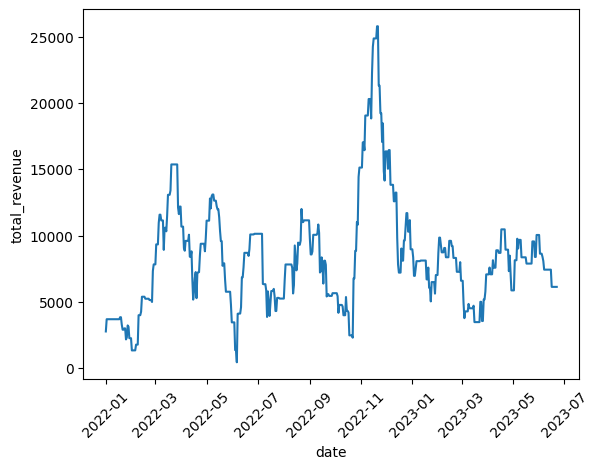

In [6]:
test = existing_data.copy()
test = test.reset_index()
roll_test = test['total_revenue'].rolling(window=30,
                                          center=True,
                                          min_periods=0).sum()

sns.lineplot(data=roll_test, x=existing_data['date'], y=roll_test)
plt.xticks(rotation=45)

In [48]:
sales_data = pd.read_sql(sql='SELECT * FROM sales;', con=conn)
sales_data

2023-06-21 19:58:01,804 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2023-06-21 19:58:01,806 INFO sqlalchemy.engine.Engine [cached since 1426s ago] {'table_schema': 'qardio', 'table_name': 'SELECT * FROM sales;'}
2023-06-21 19:58:01,811 INFO sqlalchemy.engine.Engine SELECT * FROM sales;
2023-06-21 19:58:01,813 INFO sqlalchemy.engine.Engine [raw sql] {}


,sale_id,sale_amount,start_date,end_date,duration_(days)
0,1,25,2022-01-04,2022-01-18,14
1,2,15,2022-03-14,2022-04-04,21
2,3,15,2022-04-29,2022-05-09,10
3,4,15,2022-05-15,2022-05-23,8
4,5,20,2022-06-26,2022-06-30,4
5,6,20,2022-07-27,2022-08-07,11
6,7,25,2022-08-28,2022-09-05,8
7,8,20,2022-09-25,2022-10-02,7
8,9,35,2022-11-06,2022-11-13,7
9,10,35,2022-11-17,2022-11-30,13


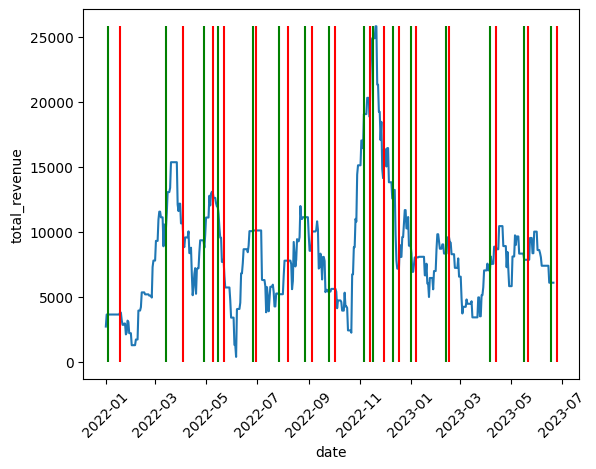

In [58]:
sns.lineplot(data=roll_test, x=existing_data['date'], y=roll_test)
plt.xticks(rotation=45)
for row in sales_data.itertuples():
    plt.vlines(row[3], ymin=0, ymax=roll_test.max(), color='g')
    plt.vlines(row[4], ymin=0, ymax=roll_test.max(), color='r')

In [57]:
for row in sales_data.itertuples():
    print(row[3], row[4])

2022-01-04 00:00:00 2022-01-18 00:00:00
2022-03-14 00:00:00 2022-04-04 00:00:00
2022-04-29 00:00:00 2022-05-09 00:00:00
2022-05-15 00:00:00 2022-05-23 00:00:00
2022-06-26 00:00:00 2022-06-30 00:00:00
2022-07-27 00:00:00 2022-08-07 00:00:00
2022-08-28 00:00:00 2022-09-05 00:00:00
2022-09-25 00:00:00 2022-10-02 00:00:00
2022-11-06 00:00:00 2022-11-13 00:00:00
2022-11-17 00:00:00 2022-11-30 00:00:00
2022-12-11 00:00:00 2022-12-18 00:00:00
2023-01-02 00:00:00 2023-01-08 00:00:00
2023-02-12 00:00:00 2023-02-16 00:00:00
2023-04-06 00:00:00 2023-04-13 00:00:00
2023-05-17 00:00:00 2023-05-22 00:00:00
2023-06-18 00:00:00 2023-06-25 00:00:00
